In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline




In [ ]:
df = pd.read_csv("BankNoteAuthentication.csv",index_col=0)
df.head()


,skewness,curtosis,entropy,class
variance,,,,
3.62160,8.6661,-2.8073,-0.44699,0
4.54590,8.1674,-2.4586,-1.46210,0
3.86600,-2.6383,1.9242,0.10645,0
3.45660,9.5228,-4.0112,-3.59440,0
0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df.drop("class", axis=1))
StandardScaler(copy=True, with_mean=True, with_std=True)
scaled_features = scaler.transform(df.drop('class',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,skewness,curtosis,entropy
0,1.149455,-0.975970,0.354561
1,1.064453,-0.895036,-0.128767
2,-0.777352,0.122218,0.618073
3,1.295478,-1.255397,-1.144029
4,-1.087038,0.736730,0.096587


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['class'], test_size=0.30)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
 metric_params=None, n_jobs=1, n_neighbors=1, p=2,
 weights='uniform')
pred = knn.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[230   4]
 [  8 170]]


In [ ]:
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.97      0.98      0.97       234
           1       0.98      0.96      0.97       178

    accuracy                           0.97       412
   macro avg       0.97      0.97      0.97       412
weighted avg       0.97      0.97      0.97       412



In [ ]:
error_rate = []
# Will take some time
for i in range(1,40):

 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

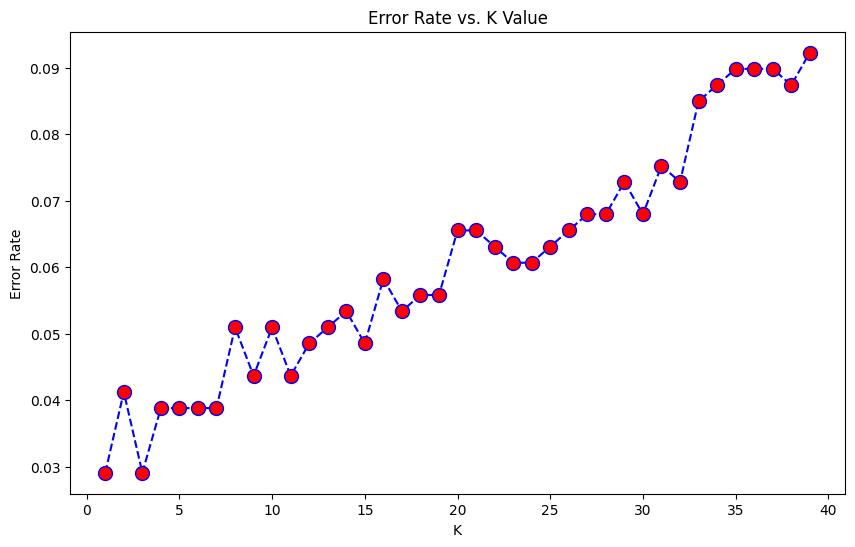

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[230   4]
 [  8 170]]


              precision    recall  f1-score   support

           0       0.97      0.98      0.97       234
           1       0.98      0.96      0.97       178

    accuracy                           0.97       412
   macro avg       0.97      0.97      0.97       412
weighted avg       0.97      0.97      0.97       412



In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))


WITH K=3


[[229   5]
 [  7 171]]


              precision    recall  f1-score   support

           0       0.97      0.98      0.97       234
           1       0.97      0.96      0.97       178

    accuracy                           0.97       412
   macro avg       0.97      0.97      0.97       412
weighted avg       0.97      0.97      0.97       412

